# Machine Learning with Scikit-learn 

**Açıklamalar:**
* Projede ekte verilen bir derse kaydolan öğrencilerin dönem boyunca katıldıkları farklı ölçme ve değerlendirme etkinliklerine ilişkin verileri içeren "Donem Sonu.xls" adlı dosya kullanılacaktır. Dosyadaki sütunlar, soldan sağa doğru etkinliklerin gerçekleştikleri zaman sırasına göre yer almaktadır. Not: Dersten başarılı olmak için şartlardan birisi, final sınavından 45 ve üstü not almaktır.
* Sorularda verilen her problem için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her model için kullanılması gerektiğini (uygun ve etkili olduğunu) düşündüğünüz öznitelikleri belirleyiniz. 
  2. Kategorik olan sütunları one-hot encoding yöntemi ile ikili vektör temsiline dönüştürünüz. Örneğin:
  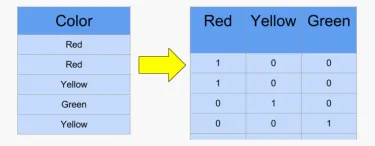
  3. Kategorik olmayan sütunlarda normalizasyon işlemi uygulayınız.
  4. Problem bir **regresyon problemi** ise 'k-fold cross-validation' ile probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hiper-parametre aramasını (hyper-parameter tunning) 'k-fold cross-validation' ile yapınız (GridSearchCV modülünü kullanabilirsiniz) ve test verisi üzerinde probleme uygun metrik**ler** kullanarak tahmin modelinizin performansını değerlendiriniz. Problem bir **kümeleme problemi** ise optimum küme sayısını belirleyiniz, belirlediğiniz küme sayısına göre verileri kümeleyiniz ve bulduğunuz kümeleri kısaca analiz edip yorumlayınız.
  5. Farklı öznitelikler ve/veya makine öğrenmesi yöntemleri kullanarak daha iyi performans gösteren 2-3 model daha geliştirmeye çalışınız (sarf ettiğiniz eforun görülebilmesi amacıyla bu modellere ilişkin kodları silmeyiniz). 
  6. Veri setinde olmayan yeni bir veri için geliştirdiğiniz en iyi modelin üreteceği çıktıyı (tahmin/küme) veriniz.
* İşlemleri gerçekleştirirken gerekli gördüğünüz yerleri (tercih ettiğiniz birşeyin nedeni v.b. gibi) açıklayınız.

### Soru 1: Bir öğrencinin ara sınav notunun tahminlenmesi (40 puan)

### Importing Dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("Donem Sonu.xls")
df.head(20)

,Öğrenci No,Kayıt Şekli,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab4 Quiz Notu,Lab4 Prg Notu,...,Lab8 Quiz Notu,Lab8 Prg Notu,Lab9 Quiz Notu,Lab9 Prg Notu,Lab10 Quiz Notu,Lab10 Prg Notu,Proje2 Notu,Proje2 Geç Gün Say,Proje2 tek/grup,Final Sınavı Notu
0,MUH1000065,tekrar,44,50,43,50,48,50,47,50,...,40,50,25,50,25,0,63,0,grup,88
1,MUH1000975,ilk,30,35,42,50,50,50,48,50,...,41,50,49,40,40,40,67,0,tek,89
2,MUH1000990,ilk,20,50,38,50,48,50,35,50,...,0,0,1,0,5,40,40,0,grup,28
3,MUH1200826,tekrar,8,50,32,50,30,50,16,50,...,10,45,3,0,0,0,72,0,grup,22
4,MUH1201209,ilk,25,30,35,50,50,30,35,50,...,0,0,0,20,15,45,37,0,grup,50
5,MUH1300199,ilk,40,50,40,50,44,50,36,50,...,46,50,30,50,10,50,44,0,grup,62
6,MUH1300201,ilk,45,50,43,50,43,50,35,50,...,0,43,30,45,0,0,27,0,grup,94
7,MUH1300202,ilk,0,50,44,50,45,50,40,50,...,46,50,0,45,0,50,86,0,tek,102
8,MUH1300205,ilk,28,50,30,50,46,50,37,47,...,25,50,20,0,10,0,48,0,grup,51
9,MUH1300207,ilk,25,50,38,50,43,50,15,47,...,30,30,20,35,0,25,59,0,grup,29


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Öğrenci No          130 non-null    object
 1   Kayıt Şekli         130 non-null    object
 2   Lab1 Quiz Notu      130 non-null    int64 
 3   Lab1 Prg Notu       130 non-null    int64 
 4   Lab2 Quiz Notu      130 non-null    int64 
 5   Lab2 Prg Notu       130 non-null    int64 
 6   Lab3 Quiz Notu      130 non-null    int64 
 7   Lab3 Prg Notu       130 non-null    int64 
 8   Lab4 Quiz Notu      130 non-null    int64 
 9   Lab4 Prg Notu       130 non-null    int64 
 10  Lab5 Quiz Notu      130 non-null    int64 
 11  Lab5 Prg Notu       130 non-null    int64 
 12  Lab6 Quiz Notu      130 non-null    int64 
 13  Lab6 Prg Notu       130 non-null    int64 
 14  Lab7 Quiz Notu      130 non-null    int64 
 15  Proje1 Notu         130 non-null    int64 
 16  Proje1 Geç Gün Say  130 no

In [3]:
dataset = df.iloc[:,1:19]
dataset


,Kayıt Şekli,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab4 Quiz Notu,Lab4 Prg Notu,Lab5 Quiz Notu,Lab5 Prg Notu,Lab6 Quiz Notu,Lab6 Prg Notu,Lab7 Quiz Notu,Proje1 Notu,Proje1 Geç Gün Say,Proje1 tek/grup,Arasınav Notu
0,tekrar,44,50,43,50,48,50,47,50,20,45,0,50,58,85,0,grup,87
1,ilk,30,35,42,50,50,50,48,50,40,40,28,45,90,72,0,tek,108
2,ilk,20,50,38,50,48,50,35,50,5,45,21,30,62,25,0,tek,67
3,tekrar,8,50,32,50,30,50,16,50,5,45,19,40,66,95,0,grup,53
4,ilk,25,30,35,50,50,30,35,50,25,0,19,25,88,59,0,grup,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,ilk,30,0,31,50,48,40,28,47,0,15,9,0,16,58,0,tek,42
126,ilk,23,50,50,50,46,48,14,50,45,45,11,50,42,79,0,grup,56
127,ilk,40,50,50,50,48,50,31,50,5,50,18,0,66,66,0,grup,52
128,ilk,30,50,44,45,44,45,5,47,5,40,9,25,34,35,0,tek,41


### Preprocessing

In [4]:
dataset['Kayıt Şekli'].value_counts()

Kayıt Şekli
ilk       126
tekrar      4
Name: count, dtype: int64

In [5]:
dataset['Kayıt Şekli'].replace(['ilk', 'tekrar'], [1, 0], inplace=True)
dataset['Kayıt Şekli'].value_counts()

Kayıt Şekli
1    126
0      4
Name: count, dtype: int64

In [6]:
dataset['Proje1 tek/grup'].value_counts()

Proje1 tek/grup
grup    110
tek      20
Name: count, dtype: int64

In [7]:
dataset['Proje1 tek/grup'].replace(['grup', 'tek'], [0, 1], inplace=True)
dataset['Proje1 tek/grup'].value_counts()

Proje1 tek/grup
0    110
1     20
Name: count, dtype: int64

In [8]:
dataset

,Kayıt Şekli,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab4 Quiz Notu,Lab4 Prg Notu,Lab5 Quiz Notu,Lab5 Prg Notu,Lab6 Quiz Notu,Lab6 Prg Notu,Lab7 Quiz Notu,Proje1 Notu,Proje1 Geç Gün Say,Proje1 tek/grup,Arasınav Notu
0,0,44,50,43,50,48,50,47,50,20,45,0,50,58,85,0,0,87
1,1,30,35,42,50,50,50,48,50,40,40,28,45,90,72,0,1,108
2,1,20,50,38,50,48,50,35,50,5,45,21,30,62,25,0,1,67
3,0,8,50,32,50,30,50,16,50,5,45,19,40,66,95,0,0,53
4,1,25,30,35,50,50,30,35,50,25,0,19,25,88,59,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,30,0,31,50,48,40,28,47,0,15,9,0,16,58,0,1,42
126,1,23,50,50,50,46,48,14,50,45,45,11,50,42,79,0,0,56
127,1,40,50,50,50,48,50,31,50,5,50,18,0,66,66,0,0,52
128,1,30,50,44,45,44,45,5,47,5,40,9,25,34,35,0,1,41


Text(0.5, 1.0, 'Correlation Between Variables')

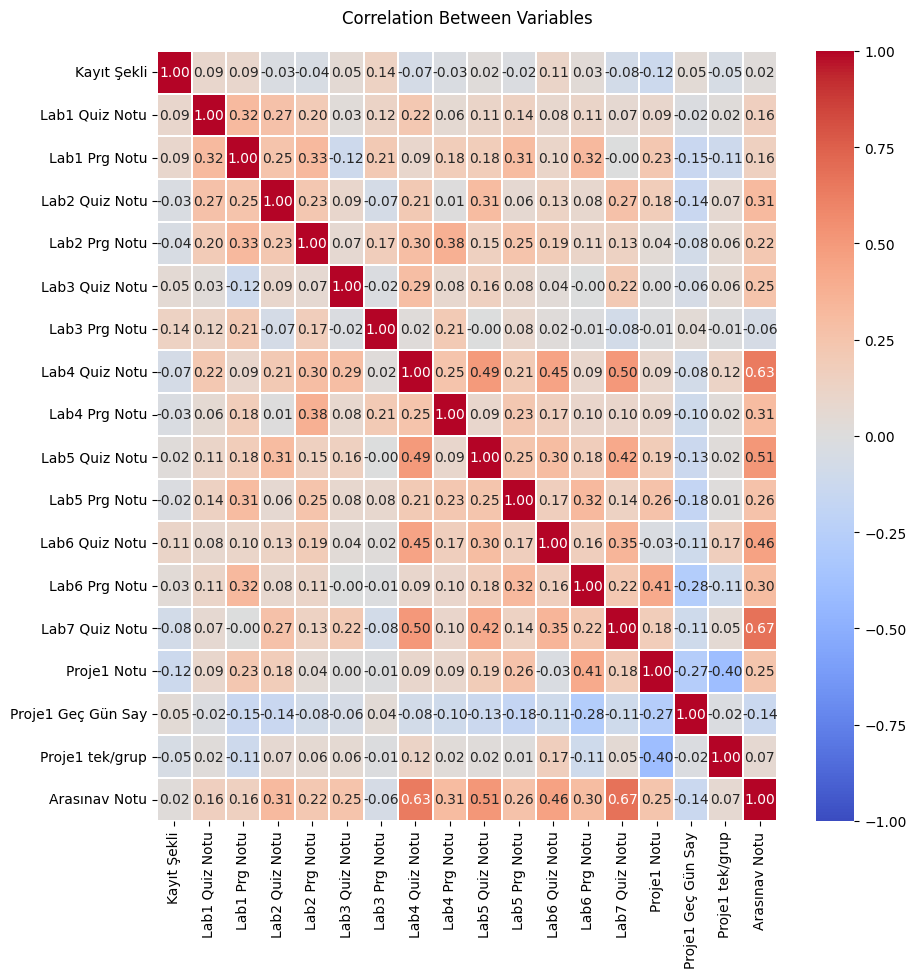

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,10))  

corr = dataset.corr()
sns.heatmap(corr, vmin=-1, vmax=1,cmap = 'coolwarm',  annot=True, fmt='.2f', linewidths=0.1,ax=ax)
plt.title("Correlation Between Variables", pad=20)

Görüldüğü üzere 'Kayıt Şekli', 'Lab3 Prg Notu' ve 'Proje1 tek/grup' sütünlarının çıktı değerleriyle korelasyonları çok düşüktür.
Bu yüzden bu değerleri kaldırmaya karar verdim.

In [10]:
X = dataset.iloc[:,:-1]
y = dataset['Arasınav Notu']
X.drop('Kayıt Şekli',axis=1, inplace = True)
X.drop('Lab3 Prg Notu',axis=1, inplace = True)
X.drop('Proje1 tek/grup',axis=1, inplace = True)
X.head(10)



,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab4 Quiz Notu,Lab4 Prg Notu,Lab5 Quiz Notu,Lab5 Prg Notu,Lab6 Quiz Notu,Lab6 Prg Notu,Lab7 Quiz Notu,Proje1 Notu,Proje1 Geç Gün Say
0,44,50,43,50,48,47,50,20,45,0,50,58,85,0
1,30,35,42,50,50,48,50,40,40,28,45,90,72,0
2,20,50,38,50,48,35,50,5,45,21,30,62,25,0
3,8,50,32,50,30,16,50,5,45,19,40,66,95,0
4,25,30,35,50,50,35,50,25,0,19,25,88,59,0
5,40,50,40,50,44,36,50,40,45,18,50,58,78,0
6,45,50,43,50,43,35,50,10,35,18,45,62,83,1
7,0,50,44,50,45,40,50,40,40,35,0,84,80,0
8,28,50,30,50,46,37,47,15,45,38,50,46,99,0
9,25,50,38,50,43,15,47,10,45,0,50,67,86,0


In [11]:
means = np.mean(X,axis=0)
stds = np.std(X, axis=0)



6. Madde için manuel olarak eklenen yeni verinin normalize edilmesi için derste gösterilen formulden yararlandım. Bunun için 'means' ve 'stds' olmak üzere 2 ayrı değişken oluşturdum.

### Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.57731078,  0.52688996,  0.24225782, ...,  0.09986201,
         0.38505503, -0.25607376],
       [ 0.46333887, -0.42005513,  0.13513701, ...,  1.22263488,
        -0.36206667, -0.25607376],
       [-0.33235536,  0.52688996, -0.2933462 , ...,  0.24020862,
        -3.06319893, -0.25607376],
       ...,
       [ 1.25903309,  0.52688996,  0.99210345, ...,  0.38055523,
        -0.70689206, -0.25607376],
       [ 0.46333887,  0.52688996,  0.34937862, ..., -0.74221764,
        -2.48848994, -0.25607376],
       [-0.73020247,  0.52688996, -0.61470861, ..., -0.53169773,
         0.38505503, -0.25607376]])

### First Approach

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()

scores=[] 
mse_list=[] 


cv = KFold(n_splits=5, random_state=42, shuffle=True)


folds = KFold(n_splits = 5, shuffle = True, random_state = 42)




for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lr_model.fit(X_train, y_train)
    y_predict = lr_model.predict(X_test)
    scores.append(lr_model.score(X_test, y_test))
    mse_fold = mean_squared_error(y_test, y_predict)
    mse_list.append(mse_fold)

In [14]:
scores

[0.33560904466325836,
 0.3752371697262391,
 0.6713187292385026,
 0.4780211137066831,
 0.5075256738011533]

In [15]:
np.mean(scores)

0.47354234622716734

In [16]:
np.mean(mse_fold)

337.3915382344892

In [17]:
lr_model.coef_

array([ 2.10994613,  0.23590423, -0.12844843, -1.59059193,  3.65124619,
        2.75905467,  3.18388866,  3.74694474,  0.77097342,  5.85659049,
        3.02477791,  8.85861572,  0.73970708,  0.80230839])

<AxesSubplot:>

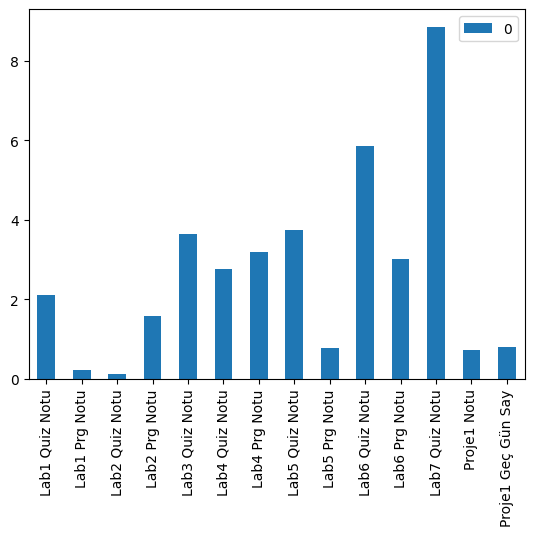

In [18]:
pd.DataFrame(abs(lr_model.coef_),index= ["Lab1 Quiz Notu","Lab1 Prg Notu", "Lab2 Quiz Notu", "Lab2 Prg Notu", "Lab3 Quiz Notu", "Lab4 Quiz Notu", "Lab4 Prg Notu", "Lab5 Quiz Notu", "Lab5 Prg Notu", "Lab6 Quiz Notu", "Lab6 Prg Notu", "Lab7 Quiz Notu", "Proje1 Notu", "Proje1 Geç Gün Say"]).plot(kind='bar')

Grafikten de anlaşıldığı üzere ağırlığı en fazla olan öznitelik "Lab7 Quiz Notu" sütunudur. Onu "Lab6 Quiz Notu" ve "Lab5 Quiz Notu" sütunları izlemektedir. Bu 3 öznitelik çıktıya en fazla etkileri olan özniteliklerdir.

### Best Approach

In [19]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=42).fit(X, y)

In [20]:
print('R2 Score:',reg.score(X, y))
print(reg.alpha_)
print(reg.intercept_)


R2 Score: 0.6503891688647168
1.0448506013900105
67.6923076923077


<AxesSubplot:>

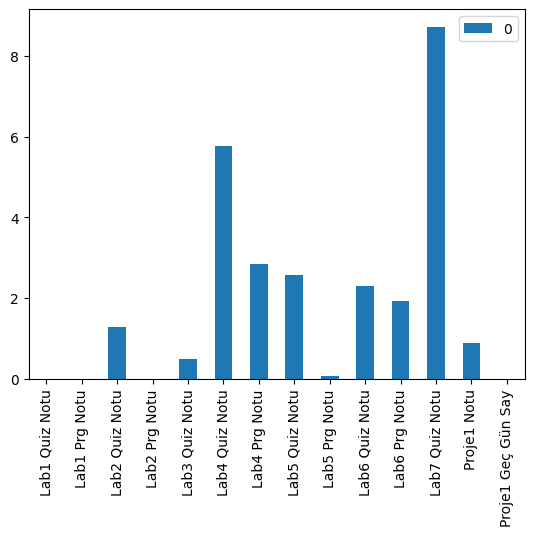

In [21]:
pd.DataFrame(abs(reg.coef_),index= ["Lab1 Quiz Notu","Lab1 Prg Notu", "Lab2 Quiz Notu", "Lab2 Prg Notu", "Lab3 Quiz Notu", "Lab4 Quiz Notu", "Lab4 Prg Notu", "Lab5 Quiz Notu", "Lab5 Prg Notu", "Lab6 Quiz Notu", "Lab6 Prg Notu", "Lab7 Quiz Notu", "Proje1 Notu", "Proje1 Geç Gün Say"]).plot(kind='bar')

Bu modelde ise "Lab1 Quiz Notu", "Lab1 Prg Notu", "Lab2 Prg Notu" ve "Proje1 Geç Gün Say" özniteliklerinin katsayıları sıfırdır. Yani çıktıya etkileri yoktur. En fazla etkiye sahip olan ise yine "Lab7 Quiz Notu" özniteliğidir. 

### New Data Prediction

In [22]:
 new_data = np.array([64, 73,42,53,49,54,67,35,45,65,71,65,82,0])



new_data = (new_data - means) / stds
new_data


Lab1 Quiz Notu        3.168699
Lab1 Prg Notu         1.978872
Lab2 Quiz Notu        0.135137
Lab2 Prg Notu         0.606270
Lab3 Quiz Notu        0.612501
Lab4 Quiz Notu        1.890556
Lab4 Prg Notu         1.825360
Lab5 Quiz Notu        1.510741
Lab5 Prg Notu         0.613720
Lab6 Quiz Notu        5.391197
Lab6 Prg Notu         1.758624
Lab7 Quiz Notu        0.345469
Proje1 Notu           0.212642
Proje1 Geç Gün Say   -0.256074
dtype: float64

Yeni veri tahminleme yapılması için normalize edildi.

In [23]:
reg.predict(np.array(new_data).reshape(1,-1))

array([107.24119021])

In [24]:
np.dot(new_data, reg.coef_)

39.54888251687978

Yeni datayı scikit metoduyla tahminlediğimde yüksek bir değer çıkıyor. Aşağıdaki hücrede ise veriyi modelin coefficientları ile çarpıp(np.dot()) farklı bir sonuç buldum. Farkın Lasso formulunde kaçırdığım bir noktadan kaynaklandığını düşünüyorum.

### Soru 2: Bir öğrencinin final sınavında baraja takılıp takılmayacağının tahminlenmesi:  (40 puan)

### Preprocessing

In [25]:
dataset2 = df.iloc[:,1:]
dataset2

,Kayıt Şekli,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab4 Quiz Notu,Lab4 Prg Notu,Lab5 Quiz Notu,...,Lab8 Quiz Notu,Lab8 Prg Notu,Lab9 Quiz Notu,Lab9 Prg Notu,Lab10 Quiz Notu,Lab10 Prg Notu,Proje2 Notu,Proje2 Geç Gün Say,Proje2 tek/grup,Final Sınavı Notu
0,tekrar,44,50,43,50,48,50,47,50,20,...,40,50,25,50,25,0,63,0,grup,88
1,ilk,30,35,42,50,50,50,48,50,40,...,41,50,49,40,40,40,67,0,tek,89
2,ilk,20,50,38,50,48,50,35,50,5,...,0,0,1,0,5,40,40,0,grup,28
3,tekrar,8,50,32,50,30,50,16,50,5,...,10,45,3,0,0,0,72,0,grup,22
4,ilk,25,30,35,50,50,30,35,50,25,...,0,0,0,20,15,45,37,0,grup,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,ilk,30,0,31,50,48,40,28,47,0,...,28,30,15,40,0,0,48,0,grup,26
126,ilk,23,50,50,50,46,48,14,50,45,...,26,30,25,20,0,0,64,0,grup,26
127,ilk,40,50,50,50,48,50,31,50,5,...,18,20,35,20,15,0,52,0,grup,32
128,ilk,30,50,44,45,44,45,5,47,5,...,14,35,3,15,10,30,12,0,tek,25


In [26]:
dataset2['Kayıt Şekli'].replace(['ilk', 'tekrar'], [1, 0], inplace=True)
dataset2['Proje1 tek/grup'].replace(['grup', 'tek'], [1, 0], inplace=True)
dataset2['Proje2 tek/grup'].replace(['grup', 'tek'], [1, 0], inplace=True)
dataset2

,Kayıt Şekli,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab4 Quiz Notu,Lab4 Prg Notu,Lab5 Quiz Notu,...,Lab8 Quiz Notu,Lab8 Prg Notu,Lab9 Quiz Notu,Lab9 Prg Notu,Lab10 Quiz Notu,Lab10 Prg Notu,Proje2 Notu,Proje2 Geç Gün Say,Proje2 tek/grup,Final Sınavı Notu
0,0,44,50,43,50,48,50,47,50,20,...,40,50,25,50,25,0,63,0,1,88
1,1,30,35,42,50,50,50,48,50,40,...,41,50,49,40,40,40,67,0,0,89
2,1,20,50,38,50,48,50,35,50,5,...,0,0,1,0,5,40,40,0,1,28
3,0,8,50,32,50,30,50,16,50,5,...,10,45,3,0,0,0,72,0,1,22
4,1,25,30,35,50,50,30,35,50,25,...,0,0,0,20,15,45,37,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,30,0,31,50,48,40,28,47,0,...,28,30,15,40,0,0,48,0,1,26
126,1,23,50,50,50,46,48,14,50,45,...,26,30,25,20,0,0,64,0,1,26
127,1,40,50,50,50,48,50,31,50,5,...,18,20,35,20,15,0,52,0,1,32
128,1,30,50,44,45,44,45,5,47,5,...,14,35,3,15,10,30,12,0,0,25


In [27]:
dataset2.loc[dataset2['Final Sınavı Notu']<45,'Final Sınavı Notu'] = 0
dataset2.loc[dataset2['Final Sınavı Notu']>45,'Final Sınavı Notu'] = 1
dataset2

,Kayıt Şekli,Lab1 Quiz Notu,Lab1 Prg Notu,Lab2 Quiz Notu,Lab2 Prg Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab4 Quiz Notu,Lab4 Prg Notu,Lab5 Quiz Notu,...,Lab8 Quiz Notu,Lab8 Prg Notu,Lab9 Quiz Notu,Lab9 Prg Notu,Lab10 Quiz Notu,Lab10 Prg Notu,Proje2 Notu,Proje2 Geç Gün Say,Proje2 tek/grup,Final Sınavı Notu
0,0,44,50,43,50,48,50,47,50,20,...,40,50,25,50,25,0,63,0,1,1
1,1,30,35,42,50,50,50,48,50,40,...,41,50,49,40,40,40,67,0,0,1
2,1,20,50,38,50,48,50,35,50,5,...,0,0,1,0,5,40,40,0,1,0
3,0,8,50,32,50,30,50,16,50,5,...,10,45,3,0,0,0,72,0,1,0
4,1,25,30,35,50,50,30,35,50,25,...,0,0,0,20,15,45,37,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,1,30,0,31,50,48,40,28,47,0,...,28,30,15,40,0,0,48,0,1,0
126,1,23,50,50,50,46,48,14,50,45,...,26,30,25,20,0,0,64,0,1,0
127,1,40,50,50,50,48,50,31,50,5,...,18,20,35,20,15,0,52,0,1,0
128,1,30,50,44,45,44,45,5,47,5,...,14,35,3,15,10,30,12,0,0,0


Burada sınıflandırma etiketini belirleyebilmek için "Final Sınavı Notu" sütununda 45 notundan düşük alan öğrenciler için 0 etiketi, 45 notundan yüksek alan öğrenciler için 1 etiketi atanmıştır. 

Text(0.5, 1.0, 'Correlation Between Variables')

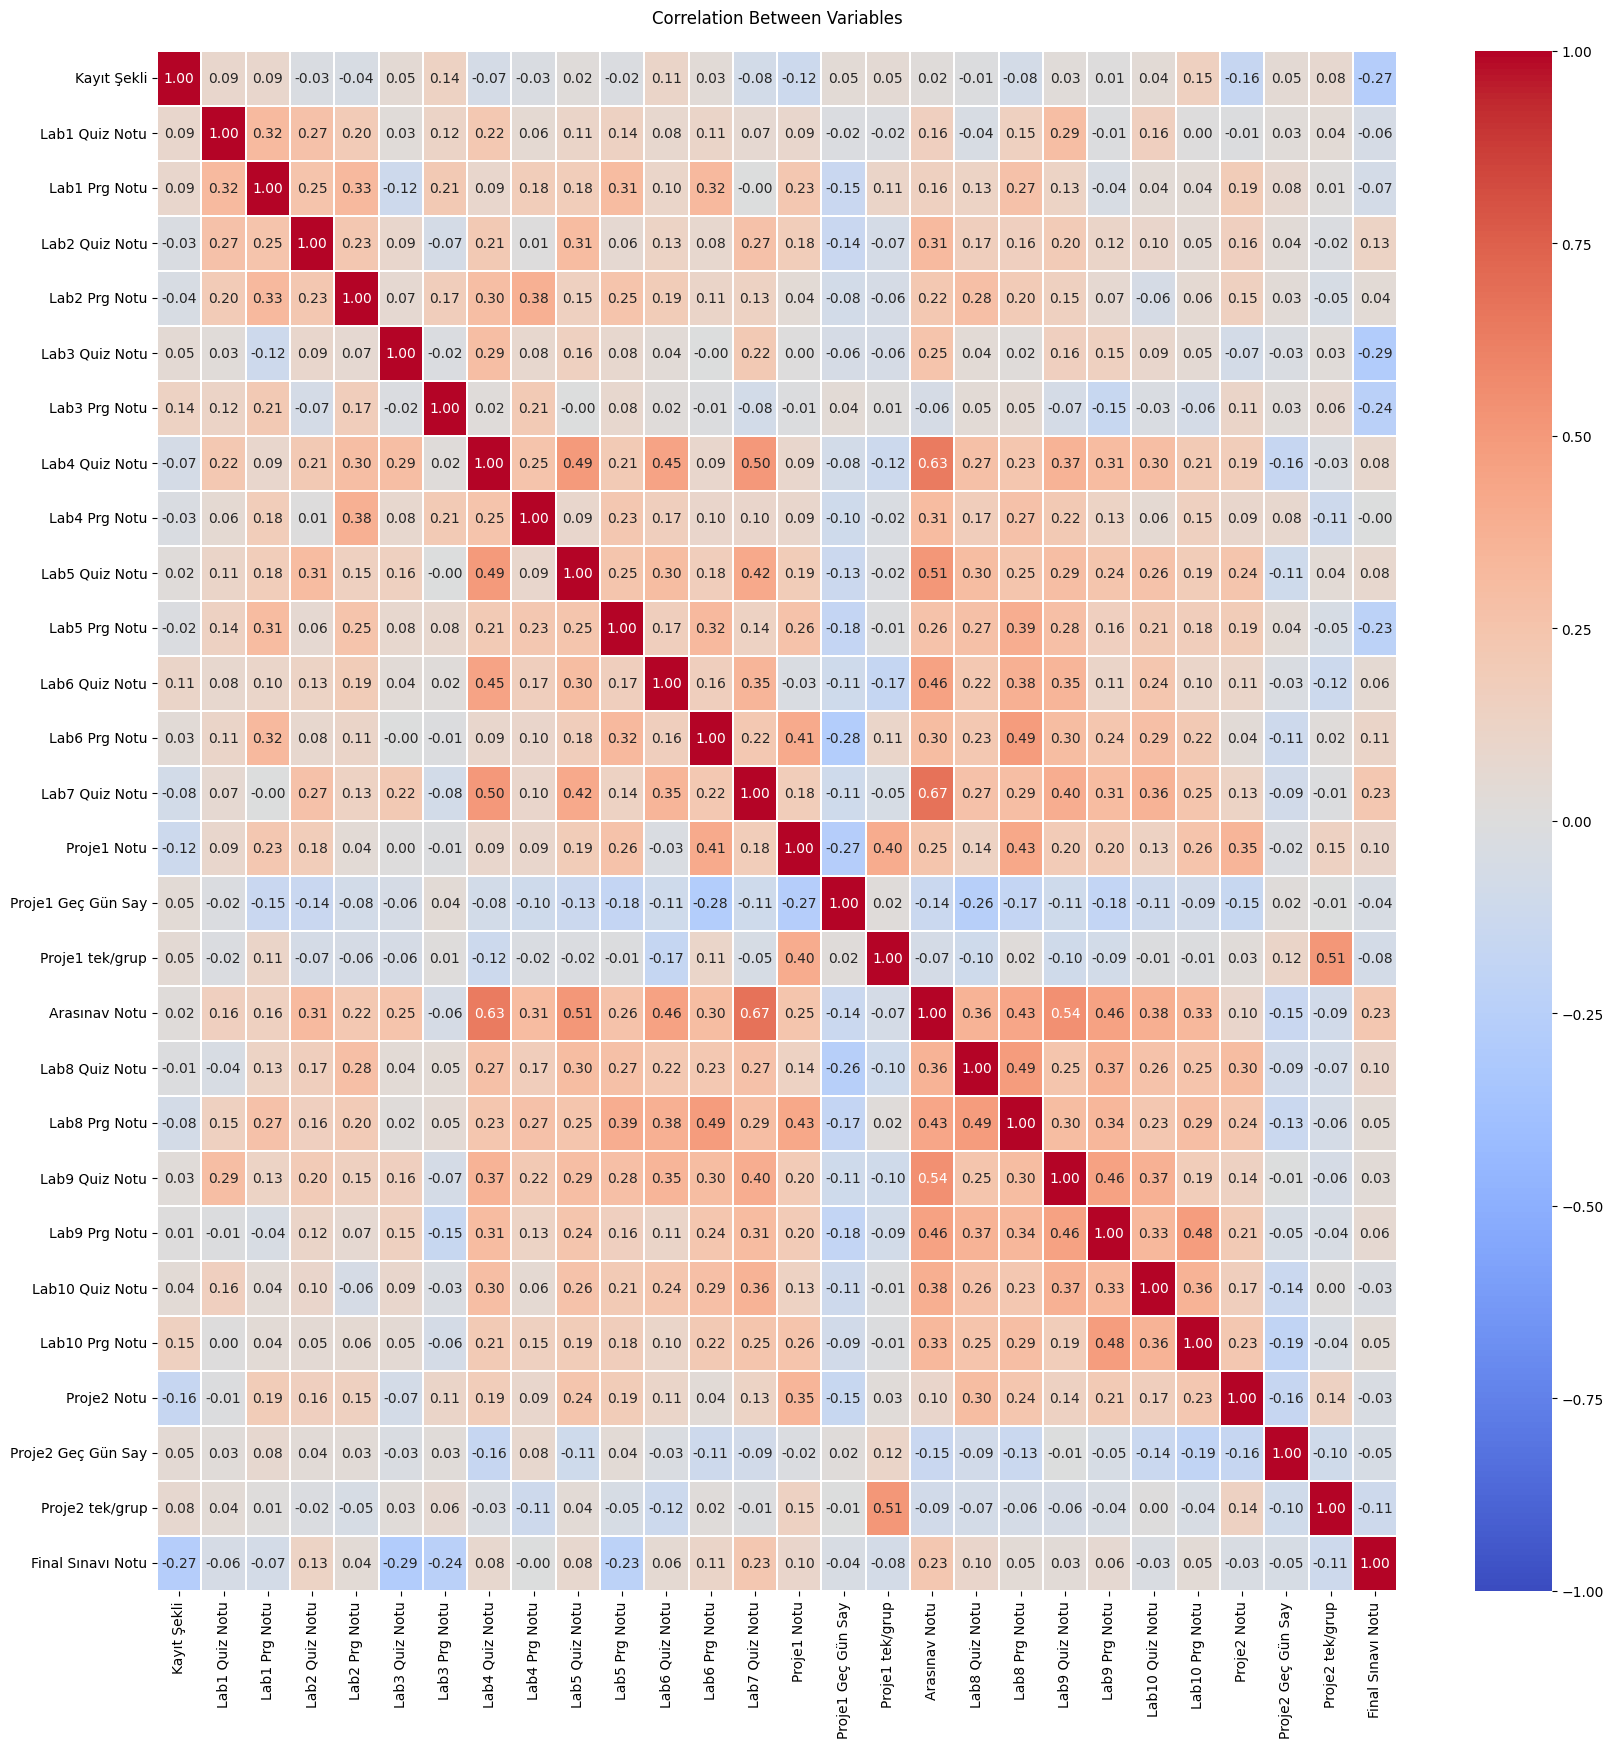

In [28]:
fig, ax = plt.subplots(figsize=(20,20))  

corr2 = dataset2.corr()
sns.heatmap(corr2, vmin=-1, vmax=1,cmap = 'coolwarm',  annot=True, fmt='.2f', linewidths=0.1,ax=ax)
plt.title("Correlation Between Variables", pad=20)

Etiket değerleri ile korelasyon değeri "0.1" üstü değerleri almaya karar verdim.

In [29]:
X2 = dataset2[['Kayıt Şekli','Lab2 Quiz Notu','Lab3 Quiz Notu',
                           'Lab3 Prg Notu','Lab5 Prg Notu','Lab6 Prg Notu',
                           'Lab7 Quiz Notu','Proje1 Notu','Arasınav Notu','Lab8 Quiz Notu','Proje2 tek/grup']]
y2 = dataset2['Final Sınavı Notu']


X2.head(10)

,Kayıt Şekli,Lab2 Quiz Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab5 Prg Notu,Lab6 Prg Notu,Lab7 Quiz Notu,Proje1 Notu,Arasınav Notu,Lab8 Quiz Notu,Proje2 tek/grup
0,0,43,48,50,45,50,58,85,87,40,1
1,1,42,50,50,40,45,90,72,108,41,0
2,1,38,48,50,45,30,62,25,67,0,1
3,0,32,30,50,45,40,66,95,53,10,1
4,1,35,50,30,0,25,88,59,72,0,1
5,1,40,44,50,45,50,58,78,94,46,1
6,1,43,43,50,35,45,62,83,100,0,1
7,1,44,45,50,40,0,84,80,101,46,0
8,1,30,46,50,45,50,46,99,74,25,1
9,1,38,43,50,45,50,67,86,71,30,1


### Train-test split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

### Scaling

In [31]:
scaler2 = StandardScaler()
X_train.iloc[:,1:-1] = scaler2.fit_transform(X_train.iloc[:,1:-1])
X_test.iloc[:,1:-1] = scaler2.transform(X_test.iloc[:,1:-1])

X_train

,Kayıt Şekli,Lab2 Quiz Notu,Lab3 Quiz Notu,Lab3 Prg Notu,Lab5 Prg Notu,Lab6 Prg Notu,Lab7 Quiz Notu,Proje1 Notu,Arasınav Notu,Lab8 Quiz Notu,Proje2 tek/grup
70,1,-0.393763,-6.238972,0.368590,0.598358,-0.206378,-2.041682,0.790402,-1.726111,-0.581055,1
78,1,0.456858,0.435899,0.368590,0.225281,-0.481549,-0.453051,0.505770,0.117653,-0.867905,1
47,1,1.064445,-0.398460,-0.550675,0.971436,0.619134,1.568842,0.904255,1.458572,1.426895,1
0,0,0.213824,0.435899,0.368590,0.598358,0.619134,0.052422,0.391917,0.746209,1.522512,1
12,1,-0.150728,-0.120340,-0.550675,0.598358,-1.031890,0.557895,-0.291201,-0.468999,-0.581055,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1,-0.150728,-0.537520,0.368590,-0.147796,0.619134,-0.453051,1.018108,-1.181363,0.088262,1
106,1,0.821410,0.435899,0.368590,0.971436,0.619134,0.630106,-0.689686,1.123342,0.566345,1
14,1,-4.160799,-0.259400,0.368590,-1.640105,-1.307061,-1.030735,-0.746612,-2.438474,-1.537222,1
92,1,0.456858,-0.120340,-0.091043,-0.147796,0.619134,-2.041682,0.278064,-1.642303,0.566345,1


### 2.1 Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


log_model = LogisticRegression()



params = {'penalty': ['l1', 'l2'],
          'solver': ['lbfgs', 'liblinear', 'newton-cg'],
          'C': np.logspace(-3,3,7)}
grid_search = GridSearchCV(log_model, param_grid = params, cv=5)                      
grid_search.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also r

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg']})

In [33]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.003124,6.248379e-03,0.000000,0.000000,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.857143,0.809524,0.857143,0.761905,1.00,0.857143,0.079682,1
15,0.006249,7.652962e-03,0.000000,0.000000,0.1,l2,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.857143,0.809524,0.809524,0.761905,1.00,0.847619,0.081927,2
17,0.000000,0.000000e+00,0.006243,0.007646,0.1,l2,newton-cg,"{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-...",0.857143,0.809524,0.809524,0.761905,1.00,0.847619,0.081927,2
10,0.003124,6.248379e-03,0.000667,0.001334,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.857143,0.761905,0.857143,0.761905,0.95,0.837619,0.070508,4
13,0.000000,0.000000e+00,0.000000,0.000000,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.857143,0.857143,0.809524,0.809524,0.85,0.836667,0.022315,5
11,0.005144,2.957053e-03,0.001052,0.000958,0.01,l2,newton-cg,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.857143,0.761905,0.809524,0.761905,0.95,0.828095,0.070444,6
9,0.003124,6.248379e-03,0.003124,0.006249,0.01,l2,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.857143,0.761905,0.809524,0.761905,0.95,0.828095,0.070444,6
22,0.003124,6.248665e-03,0.000000,0.000000,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.857143,0.809524,0.809524,0.761905,0.90,0.827619,0.047083,8
29,0.009367,7.648431e-03,0.003129,0.006259,10.0,l2,newton-cg,"{'C': 10.0, 'penalty': 'l2', 'solver': 'newton...",0.904762,0.809524,0.761905,0.809524,0.85,0.827143,0.047800,9
27,0.012502,6.250890e-03,0.000000,0.000000,10.0,l2,lbfgs,"{'C': 10.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.904762,0.809524,0.761905,0.809524,0.85,0.827143,0.047800,9


In [34]:
grid_search.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [35]:
y_pred_log = grid_search.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

acc_log = accuracy_score(y_test,y_pred_log)
pre_log = precision_score(y_test,y_pred_log)
rec_log = recall_score(y_test,y_pred_log)
f1_log = f1_score(y_test,y_pred_log)
print("Accuracy score:",acc_log)
print("Precision score:", pre_log)
print("Recall score:", rec_log)
print("F1 score: ", f1_log)


Accuracy score: 0.7307692307692307
Precision score: 0.625
Recall score: 0.5555555555555556
F1 score:  0.5882352941176471


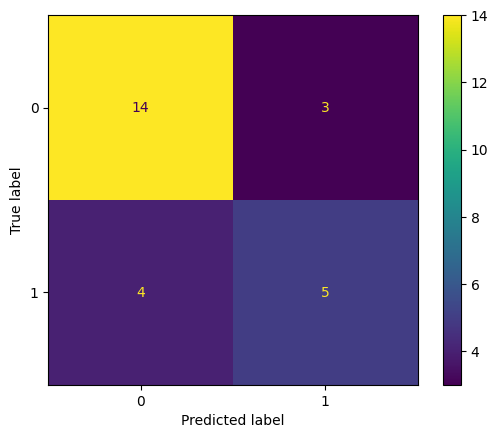

In [37]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log)).plot()

### 2.2 Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

param_rf = {'max_depth' : [4, 8, 16, ],
              'criterion' : ['entropy', 'gini', ],
              'min_samples_split' : [2, 4, ]}

        
grid_search_rf = GridSearchCV(rf_model, param_grid = param_rf, cv=5)                      
grid_search_rf.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 8, 16], 'min_samples_split': [2, 4]})

In [39]:
pd.DataFrame(grid_search_rf.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095229,0.007364,0.009929,0.005944,entropy,4,2,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.857143,0.857143,0.809524,0.666667,0.95,0.828095,0.092685,1
3,0.094103,0.009128,0.006249,0.007653,entropy,8,4,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.857143,0.857143,0.857143,0.666667,0.90,0.827619,0.082170,2
4,0.094149,0.005843,0.009158,0.007487,entropy,16,2,"{'criterion': 'entropy', 'max_depth': 16, 'min...",0.857143,0.857143,0.857143,0.666667,0.90,0.827619,0.082170,2
1,0.099833,0.010472,0.003251,0.006205,entropy,4,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.857143,0.809524,0.857143,0.619048,0.95,0.818571,0.109673,4
6,0.096447,0.005425,0.006248,0.007653,gini,4,2,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.857143,0.809524,0.809524,0.666667,0.95,0.818571,0.091652,4
7,0.096625,0.005815,0.009387,0.007664,gini,4,4,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.857143,0.761905,0.857143,0.666667,0.95,0.818571,0.096473,4
5,0.094700,0.006473,0.009385,0.007662,entropy,16,4,"{'criterion': 'entropy', 'max_depth': 16, 'min...",0.857143,0.809524,0.904762,0.619048,0.90,0.818095,0.105297,7
9,0.091821,0.007255,0.012420,0.006212,gini,8,4,"{'criterion': 'gini', 'max_depth': 8, 'min_sam...",0.857143,0.809524,0.857143,0.666667,0.90,0.818095,0.080947,7
2,0.099421,0.007031,0.006248,0.007653,entropy,8,2,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.857143,0.809524,0.857143,0.619048,0.90,0.808571,0.098993,9
10,0.094542,0.001630,0.006249,0.007653,gini,16,2,"{'criterion': 'gini', 'max_depth': 16, 'min_sa...",0.857143,0.809524,0.857143,0.619048,0.90,0.808571,0.098993,9


In [40]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4)

In [41]:
y_pred_rf = grid_search_rf.predict(X_test)

In [42]:
acc_rf = accuracy_score(y_test,y_pred_rf)
pre_rf = precision_score(y_test,y_pred_rf)
rec_rf = recall_score(y_test,y_pred_rf)
f1_rf = f1_score(y_test,y_pred_rf)
print("Accuracy score:",acc_rf)
print("Precision score:", pre_rf)
print("Recall score:", rec_rf)
print("F1 score: ", f1_rf)

Accuracy score: 0.8076923076923077
Precision score: 0.75
Recall score: 0.6666666666666666
F1 score:  0.7058823529411765


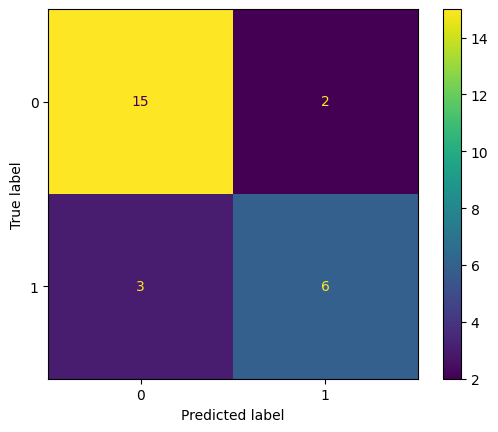

In [43]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()

### 2.3 K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

params_knn = {'n_neighbors' : [3,5,7],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_search_knn = GridSearchCV(knn_model, param_grid = params_knn, cv=5)                      
grid_search_knn.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [45]:
pd.DataFrame(grid_search_knn.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.000000,0.000000e+00,0.003130,0.006261,auto,manhattan,5,uniform,"{'algorithm': 'auto', 'metric': 'manhattan', '...",0.952381,0.809524,0.809524,0.761905,0.90,0.846667,0.069230,1
32,0.001993,2.503282e-06,0.002195,0.000399,ball_tree,manhattan,5,uniform,"{'algorithm': 'ball_tree', 'metric': 'manhatta...",0.952381,0.809524,0.809524,0.761905,0.90,0.846667,0.069230,1
68,0.001996,6.327148e-04,0.004786,0.000745,brute,manhattan,5,uniform,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.952381,0.809524,0.809524,0.761905,0.90,0.846667,0.069230,1
50,0.000467,9.339333e-04,0.000405,0.000810,kd_tree,manhattan,5,uniform,"{'algorithm': 'kd_tree', 'metric': 'manhattan'...",0.952381,0.809524,0.809524,0.761905,0.90,0.846667,0.069230,1
69,0.002792,3.991128e-04,0.006583,0.000798,brute,manhattan,5,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",0.952381,0.809524,0.809524,0.761905,0.85,0.836667,0.064235,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.002793,3.988509e-04,0.007181,0.000398,brute,minkowski,3,distance,"{'algorithm': 'brute', 'metric': 'minkowski', ...",0.857143,0.809524,0.666667,0.619048,0.65,0.720476,0.094612,65
7,0.000000,0.000000e+00,0.003118,0.006236,auto,euclidean,3,distance,"{'algorithm': 'auto', 'metric': 'euclidean', '...",0.857143,0.809524,0.666667,0.619048,0.65,0.720476,0.094612,65
37,0.001995,1.715289e-06,0.001994,0.000002,kd_tree,minkowski,3,distance,"{'algorithm': 'kd_tree', 'metric': 'minkowski'...",0.857143,0.809524,0.666667,0.619048,0.65,0.720476,0.094612,65
1,0.001136,7.697984e-04,0.000998,0.000893,auto,minkowski,3,distance,"{'algorithm': 'auto', 'metric': 'minkowski', '...",0.857143,0.809524,0.666667,0.619048,0.65,0.720476,0.094612,65


In [46]:
grid_search_knn.best_estimator_

KNeighborsClassifier(metric='manhattan')

In [47]:
y_pred_knn = grid_search_knn.predict(X_test)

In [48]:
acc_knn = accuracy_score(y_test,y_pred_knn)
pre_knn = precision_score(y_test,y_pred_knn)
rec_knn = recall_score(y_test,y_pred_knn)
f1_knn = f1_score(y_test,y_pred_knn)
print("Accuracy score:",acc_knn)
print("Precision score:", pre_knn)
print("Recall score:", rec_knn)
print("F1 score: ", f1_knn)

Accuracy score: 0.6153846153846154
Precision score: 0.4444444444444444
Recall score: 0.4444444444444444
F1 score:  0.4444444444444444


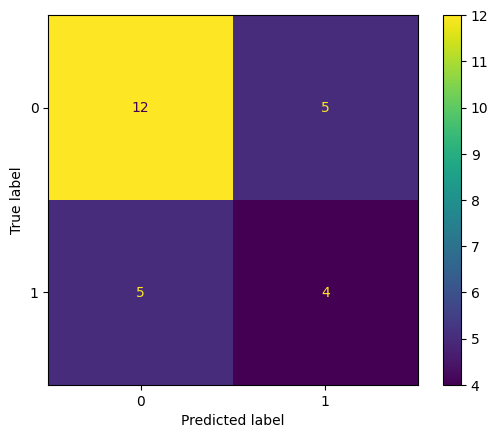

In [49]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()

Ödevi yaparken gözlemlediğim sonuçlarda KNN algoritması normalizasyon yapmadığım takdirde daha yüksek skorlara sahip oluyor fakat ödev maddelerinde her adımda normalizasyon istendiği için böyle bıraktım. Sonuç olarak sınıflandırma modellerinde en yüksek değerlere sahip model Rain Forest algoritması olmuştur.

Accuracy score: 0.8076923076923077

Precision score: 0.75

Recall score: 0.6666666666666666



F1 score:  0.7058823529411765

### New Data Prediction

In [50]:
new_data2 = np.array([1,50,55,60,65,45,50,70,75,80,0])

new_data2[1:-1] = scaler2.transform(new_data2[1:-1].reshape(1, -1))

c:\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
grid_search_rf.predict(new_data2.reshape(1, -1))

c:\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### Soru 3: Öğrencilerin benzerliklerine göre gruplara ayrılması (40 puan)

In [52]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Öznitelikleri seçerken insanları birbirinden kesin olarak ayıran kategorik verilerin tamamını ve dönem sonu notuna en büyük etkileri sağlayacağını düşündüğüm notları seçtim.

### Preprocessing

In [53]:
dataset3 = df[['Kayıt Şekli','Proje1 Notu','Arasınav Notu','Proje2 Notu','Final Sınavı Notu', 'Proje2 tek/grup','Proje1 tek/grup']]
dataset3

,Kayıt Şekli,Proje1 Notu,Arasınav Notu,Proje2 Notu,Final Sınavı Notu,Proje2 tek/grup,Proje1 tek/grup
0,tekrar,85,87,63,88,grup,grup
1,ilk,72,108,67,89,tek,tek
2,ilk,25,67,40,28,grup,tek
3,tekrar,95,53,72,22,grup,grup
4,ilk,59,72,37,50,grup,grup
...,...,...,...,...,...,...,...
125,ilk,58,42,48,26,grup,tek
126,ilk,79,56,64,26,grup,grup
127,ilk,66,52,52,32,grup,grup
128,ilk,35,41,12,25,tek,tek


In [54]:
dataset3['Kayıt Şekli'].replace(['ilk', 'tekrar'], [1, 0], inplace=True)
dataset3['Proje1 tek/grup'].replace(['grup', 'tek'], [1, 0], inplace=True)
dataset3['Proje2 tek/grup'].replace(['grup', 'tek'], [1, 0], inplace=True)
dataset3

C:\Users\DELL\AppData\Local\Temp\ipykernel_37696\1227869739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['Kayıt Şekli'].replace(['ilk', 'tekrar'], [1, 0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_37696\1227869739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3['Proje1 tek/grup'].replace(['grup', 'tek'], [1, 0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_37696\1227869739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Kayıt Şekli,Proje1 Notu,Arasınav Notu,Proje2 Notu,Final Sınavı Notu,Proje2 tek/grup,Proje1 tek/grup
0,0,85,87,63,88,1,1
1,1,72,108,67,89,0,0
2,1,25,67,40,28,1,0
3,0,95,53,72,22,1,1
4,1,59,72,37,50,1,1
...,...,...,...,...,...,...,...
125,1,58,42,48,26,1,0
126,1,79,56,64,26,1,1
127,1,66,52,52,32,1,1
128,1,35,41,12,25,0,0


In [55]:
scaler3 = StandardScaler()


dataset3[['Proje1 Notu','Arasınav Notu','Proje2 Notu','Final Sınavı Notu']] = scaler3.fit_transform(dataset3[['Proje1 Notu','Arasınav Notu','Proje2 Notu','Final Sınavı Notu']])
dataset3

C:\Users\DELL\AppData\Local\Temp\ipykernel_37696\2893864250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3[['Proje1 Notu','Arasınav Notu','Proje2 Notu','Final Sınavı Notu']] = scaler3.fit_transform(dataset3[['Proje1 Notu','Arasınav Notu','Proje2 Notu','Final Sınavı Notu']])


,Kayıt Şekli,Proje1 Notu,Arasınav Notu,Proje2 Notu,Final Sınavı Notu,Proje2 tek/grup,Proje1 tek/grup
0,0,0.385055,0.820398,0.724142,1.690495,1,1
1,1,-0.362067,1.712704,0.947882,1.730279,0,0
2,1,-3.063199,-0.029417,-0.562361,-0.696518,1,0
3,0,0.959764,-0.624287,1.227556,-0.935220,1,1
4,1,-1.109188,0.183037,-0.730166,0.178720,1,1
...,...,...,...,...,...,...,...
125,1,-1.166659,-1.091685,-0.114882,-0.776085,1,0
126,1,0.040230,-0.496815,0.780077,-0.776085,1,1
127,1,-0.706892,-0.666778,0.108858,-0.537384,1,1
128,1,-2.488490,-1.134176,-2.128538,-0.815869,0,0


### K-means

Öncelikle optimum küme sayısını bulmak için elbow metodunu kullanıyorum ve sonuç 4 küme çıkıyor.

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

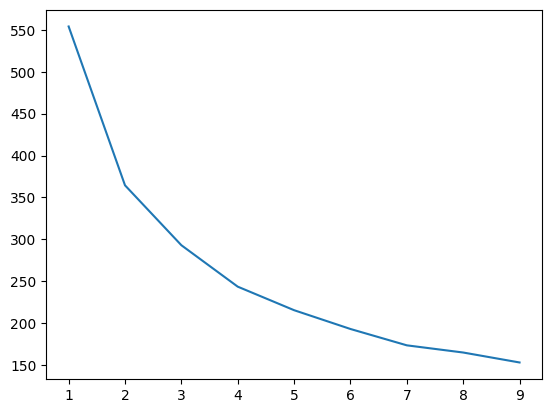

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

costs = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(dataset3)
    costs.append(model.inertia_)
    model.inertia_
    
plt.plot(np.arange(1,10), costs)

Sonraki modellerde bu bulduğum optimum değeri kullandım.

In [57]:
km_model = KMeans(n_clusters=4)
km_model.fit(dataset3)

c:\python\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [58]:
km_model.cluster_centers_

array([[ 0.96428571,  0.10796319,  0.06315245, -1.02981692, -0.28021176,
         0.82142857,  0.89285714],
       [ 0.94444444,  0.17273198, -1.11293053,  0.43669862, -0.88659525,
         1.        ,  1.        ],
       [ 1.        , -2.30723557, -0.64389813, -0.73877102, -0.69651826,
         0.76923077,  0.30769231],
       [ 0.98113208,  0.39156117,  0.88052654,  0.42863673,  0.92109614,
         0.86792453,  0.8490566 ]])

In [59]:
km_model.inertia_

243.48888332129656

Dirsek grafiğindeki optimum değer.

In [60]:
labels = km_model.labels_
pd.DataFrame(labels)[0].value_counts()

0
3    53
1    36
0    28
2    13
Name: count, dtype: int64

7 özniteliğe göre kümeleme gerçekleştirdiğim için görsel bir grafik kullanmadım. Verilerin büyük çoğunluğu '0' ve '1' kümelerine atanmıştır.

### Hierarchical Clustering (Agglomerative)

In [61]:
model = AgglomerativeClustering(n_clusters=4, linkage='complete')
model.fit(dataset3)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [62]:
labels2 = model.labels_
pd.DataFrame(labels2)[0].value_counts()

0
0    72
3    23
2    22
1    13
Name: count, dtype: int64

Hiyerarşik kümeleme yönteminde de yine en çok '0' ve '1' kümelerine verilerin atandığı görülüyor.

In [63]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

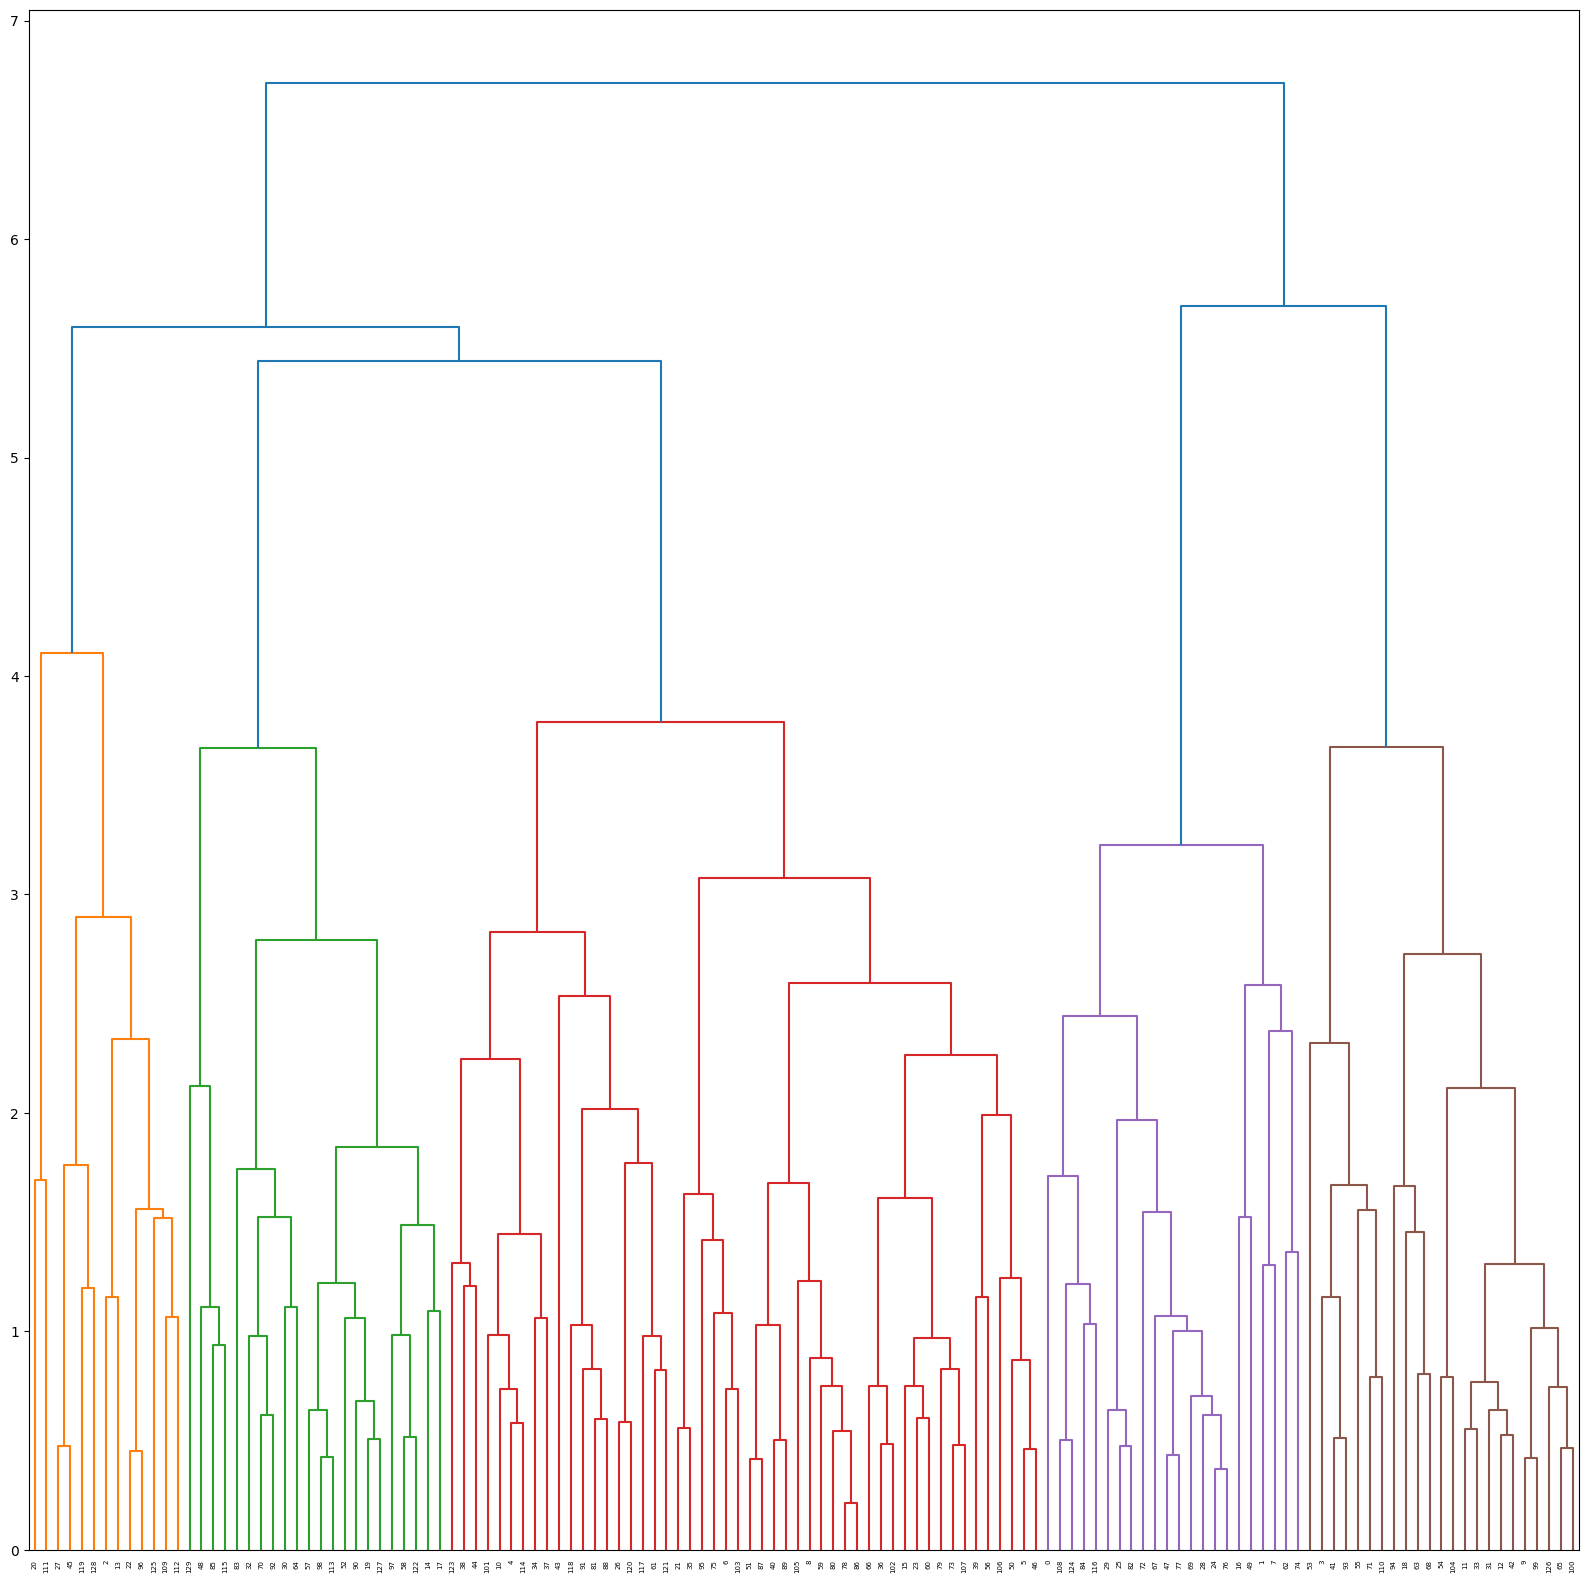

In [64]:
Z = linkage(dataset3, method='complete')

plt.figure(figsize=(20,20))
dendrogram(Z)
plt.show()

### New Data Prediction

In [65]:
new_data3 = np.array([1,60,70,80,90,0,1])
km_model.predict(new_data3.reshape(1,-1))

c:\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])